The following code is created to test and compare the performance of PCA and autoencoder neural network in image compression and decompession with the minimal lost of information. The dataset used was Mnist.

First of all a sequential neural network was created and trained. This neural network will work as a judge in this project, which nothing more than a image classifier with high accuracy is was distinguishes it. The highest  the judge's results on the decompessed data the better the method used.

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.callbacks import TensorBoard

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape((-1,28*28))/255.0
x_test = x_test.reshape((-1,28*28))/255.0

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.np_utils.to_categorical(y_test,num_classes=10)

In [ ]:
from keras.models import sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
judge = keras.Sequential()
judge.add(Dense(64,activation='relu',input_dim=784))
judge.add(Dense(64,activation='relu'))
judge.add(Dense(128,activation='relu'))
judge.add(Dense(64,activation='relu'))
judge.add(Dense(32,activation='relu'))
judge.add(Dense(10,activation='softmax'))

In [ ]:
Optimizer = Adam(learning_rate=0.001)
judge.compile(loss ='categorical_crossentropy',
              optimizer = Optimizer,
              metrics = ['accuracy'])

In [ ]:
judge.fit(x_train,y_train,epochs=20,batch_size=32,verbose=1)
print("train accuracy:" ,judge.evaluate(x_train,y_train,batch_size=128))
print("test accuracy:" ,judge.evaluate(x_test,y_test,batch_size=128))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2905 - accuracy: 0.9115
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1264 - accuracy: 0.9614
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0974 - accuracy: 0.9705
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0820 - accuracy: 0.9748
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0698 - accuracy: 0.9783
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0577 - accuracy: 0.9816
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9834
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0455 - accuracy: 0.9857
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0416 - accuracy: 0.9867
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.040

the judge as test & train accuracy > 99%

Now the first autoencoder is created, which compress the image from 784 (28*28) dimensions to 32.

In [ ]:
from keras import layers
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 5s 17ms/step - loss: 0.2493 - val_loss: 0.1702
Epoch 2/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1523 - val_loss: 0.1351
Epoch 3/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1308 - val_loss: 0.1244
Epoch 4/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1226 - val_loss: 0.1181
Epoch 5/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1166 - val_loss: 0.1124
Epoch 6/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1118 - val_loss: 0.1093
Epoch 7/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1086 - val_loss: 0.1058
Epoch 8/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1060 - val_loss: 0.1040
Epoch 9/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1039 - val_loss: 0.1018
Epoch 10/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1021 - val_lo

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

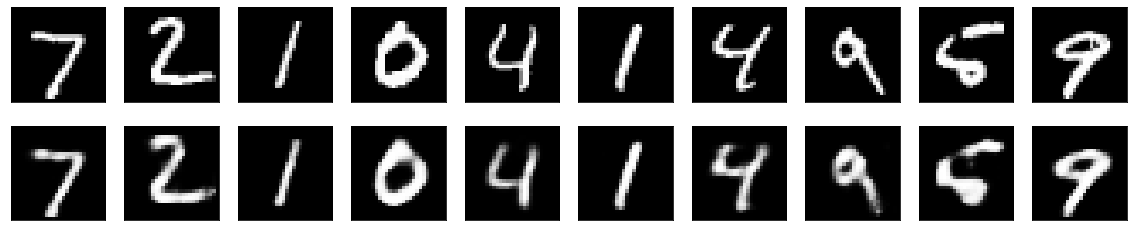

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
print("autoencoder accuracy:" ,judge.evaluate(decoded_imgs,y_test,batch_size=128))

79/79 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9632
autoencoder accuracy: [0.1700972318649292, 0.9631999731063843]


Now using PCA to compress the same images down to 32 dimensions

In [ ]:
from sklearn.decomposition import PCA
pca_32 = PCA(32)
pca_32.fit(x_train)

train_32 = pca_32.transform(x_train)
test_32 = pca_32.transform(x_test)

approximation = pca_32.inverse_transform(test_32)

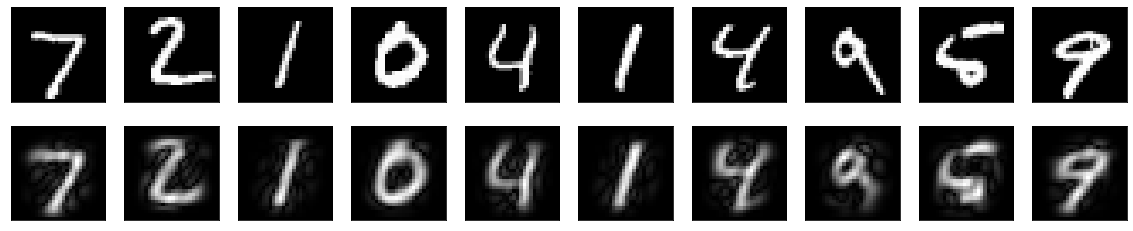

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.abs(approximation[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
print("pca autoencoder accuracy:" ,judge.evaluate(approximation.reshape((-1,28*28))/255.0,y_test,batch_size=128))

79/79 [==============================] - 0s 2ms/step - loss: 3.0615 - accuracy: 0.0892
pca autoencoder accuracy: [3.061532497406006, 0.08919999748468399]


Creating new autoencoders for greater compression down to 8 dimensions.

In [ ]:
encoded_2 = layers.Dense(128, activation='relu')(input_img)
encoded_2 = layers.Dense(64, activation='relu')(encoded_2)
encoded_2 = layers.Dense(32, activation='relu')(encoded_2)
encoded_2 = layers.Dense(16, activation='relu')(encoded_2)
encoded_2 = layers.Dense(8,activation='relu')(encoded_2)

decoded_2 = layers.Dense(16, activation='relu')(encoded_2)
decoded_2 = layers.Dense(32, activation='relu')(decoded_2)
decoded_2 = layers.Dense(64, activation='relu')(decoded_2)
decoded_2 = layers.Dense(128, activation='relu')(decoded_2)
decoded_2 = layers.Dense(784, activation='sigmoid')(decoded_2)

autoencoder_2 = keras.Model(input_img, decoded_2)
autoencoder_2.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder_2.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 5s 17ms/step - loss: 0.2826 - val_loss: 0.2217
Epoch 2/20
235/235 [==============================] - 5s 22ms/step - loss: 0.2092 - val_loss: 0.1962
Epoch 3/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1883 - val_loss: 0.1798
Epoch 4/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1761 - val_loss: 0.1719
Epoch 5/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1693 - val_loss: 0.1657
Epoch 6/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1629 - val_loss: 0.1588
Epoch 7/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1579 - val_loss: 0.1553
Epoch 8/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1550 - val_loss: 0.1532
Epoch 9/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1530 - val_loss: 0.1518
Epoch 10/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1514 - val_lo

In [ ]:
decoded_imgs_2 = autoencoder_2.predict(x_test)

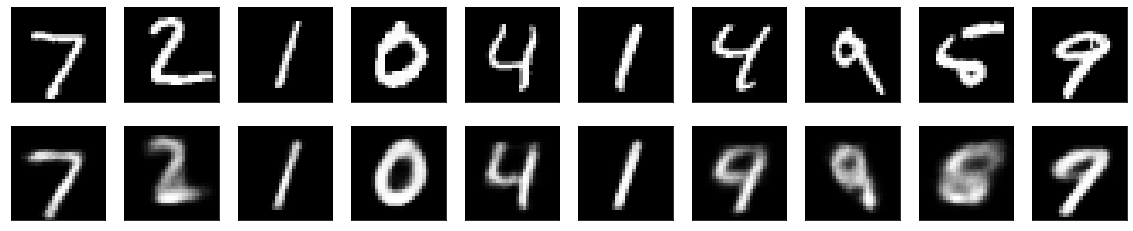

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca_8 = PCA(8)
pca_8.fit(x_train)

train_8 = pca_8.transform(x_train)
test_8 = pca_8.transform(x_test)

approximation_8 = pca_8.inverse_transform(test_8)

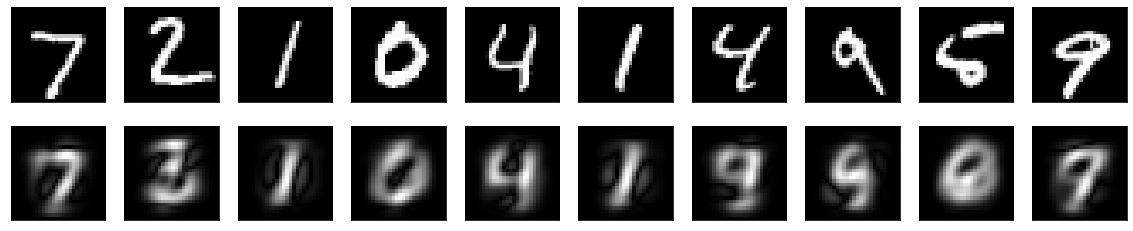

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.abs(approximation_8[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
print("2nd_pca autoencoder accuracy:" ,judge.evaluate(approximation_8.reshape((-1,28*28))/255.0,y_test,batch_size=128))
print("autoencoder accuracy:" ,judge.evaluate(decoded_imgs_2,y_test,batch_size=128))

79/79 [==============================] - 0s 2ms/step - loss: 3.0754 - accuracy: 0.0892
2nd_pca autoencoder accuracy: [3.075423002243042, 0.08919999748468399]
79/79 [==============================] - 0s 2ms/step - loss: 0.9616 - accuracy: 0.8541
autoencoder accuracy: [0.9616281390190125, 0.8540999889373779]


A we can see from both the accuracy of the judge but also from the images generated autoencoders as far better method for compression and decompession than PCA. In addition, we can conclude that the greater the compression the more information is lost, so there is a trade-off between compression and information.